# Bike Price Prediction

 importing the Required Libraries

In [89]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

import pickle

In [90]:
#importing the data

data = pd.read_csv('bike.csv')

In [91]:
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)

# Exploring the Data

In [92]:
#exploring the data
data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [93]:
#checking the null value
data.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [94]:
np.round(data.describe(),2)

,selling_price,year,km_driven,ex_showroom_price
count,1061.00,1061.00,1061.00,626.00
mean,59638.15,2013.87,34359.83,87958.71
std,56304.29,4.30,51623.15,77496.59
min,5000.00,1988.00,350.00,30490.00
25%,28000.00,2011.00,13500.00,54852.00
50%,45000.00,2015.00,25000.00,72752.50
75%,70000.00,2017.00,43000.00,87031.50
max,760000.00,2020.00,880000.00,1278000.00


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [96]:
data.shape #1061 rows and 7 columns

(1061, 7)

In [97]:
data['name'].value_counts()

Bajaj Pulsar 150                              41
Royal Enfield Classic 350                     27
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Royal Enfield Thunderbird 350                 19
Hero Honda Splendor Plus                      17
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
Honda Activa 3G                               15
Honda Shine                                   15
Honda CB Unicorn 150                          14
TVS Apache RTR 160                            14
Bajaj Pulsar 135 LS                           13
Yamaha FZ16                                   12
Honda Activa 5G                               12
Hero Glamour 125                              11
Bajaj Pulsar 150 [2001-2011]                  11
Hero Honda CBZ extreme                        11
Bajaj Discover 100                            11
Hero Splendor Plus  

Text(0.5, 0, 'Count')

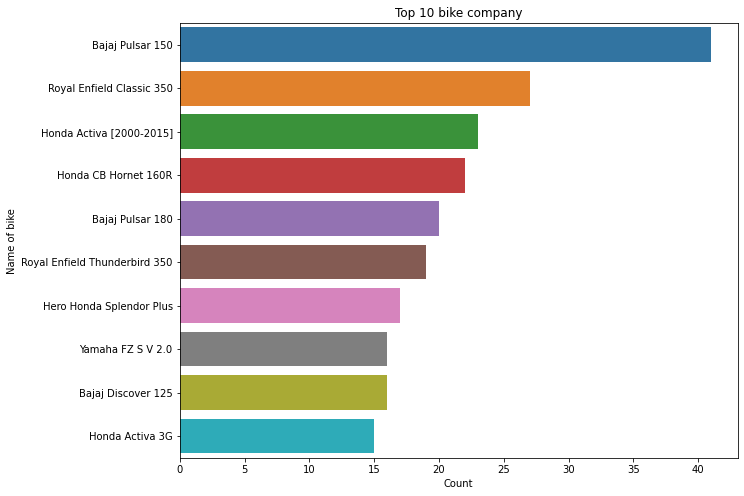

In [98]:
#DATA VISUALIZATION
top_bike_company = data['name'].value_counts().head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x = top_bike_company, y = top_bike_company.index)
plt.ylabel('Name of bike')
plt.title('Top 10 bike company')
plt.xlabel('Count')

# Data Preprocessing

In [99]:
#function for including 'hero_honda' under brand 'hero'
def bike_brand(model, exc_hero_honda=False):
    model_list=[]
    if exc_hero_honda:
        for i in data['name']:
            if model in i and 'Hero' not in i:
                model_list.append(i)
        return model_list
    else:
        for i in data['name']:
            if model in i:
                model_list.append(i)
        return model_list
    

In [100]:
#major motorcycle brand list
royal_enfield = bike_brand('Royal Enfield')
honda = bike_brand('Honda',exc_hero_honda=True)
bajaj = bike_brand('Bajaj')
yamaha = bike_brand('Yamaha')
suzuki = bike_brand('Suzuki')
hero = bike_brand('Hero')
tvs = bike_brand('TVS')
ktm = bike_brand('KTM')


In [101]:
#creating a function to apply it on 'name' column and generate new column
def brand(i):
    if i in royal_enfield:
        return 'Royal Enfield'
    elif i in honda:
        return 'Honda'
    elif i in bajaj:
        return 'Bajaj'
    elif i in yamaha:
        return 'Yamaha'
    elif i in hero:
        return 'Hero'    
    elif i in tvs:
        return 'TVS'    
    elif i in suzuki:
        return 'Suzuki'  
    elif i in ktm:
        return 'KTM' 
    else:
        return 'Other'



In [102]:
data['brand'] = data['name'].apply(lambda x:brand(x))
data.head(20)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,brand
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,Royal Enfield
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,Honda
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,Royal Enfield
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,Yamaha
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,Yamaha
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0,Honda
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0,Honda
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,Royal Enfield
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN,Hero
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0,Bajaj


In [103]:
data.drop(columns='name',axis=1, inplace=True)

In [104]:
# now we drop the 'name' column

data.head()

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,brand
0,175000,2019,Individual,1st owner,350,NaN,Royal Enfield
1,45000,2017,Individual,1st owner,5650,NaN,Honda
2,150000,2018,Individual,1st owner,12000,148114.0,Royal Enfield
3,65000,2015,Individual,1st owner,23000,89643.0,Yamaha
4,20000,2011,Individual,2nd owner,21000,NaN,Yamaha


In [105]:
#imputing the missing value in 'ex_showroom_price' using category class
list = data['brand'].unique()
data_copy = data.copy()
for i in list:
    data_copy.update(data[data.loc[:,'brand']==i]['ex_showroom_price'].replace(np.nan,data[data.loc[:,'brand']==i]['ex_showroom_price'].mean()))


In [106]:
data_copy.isnull().sum()

selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
brand                0
dtype: int64

<AxesSubplot:xlabel='ex_showroom_price', ylabel='Density'>

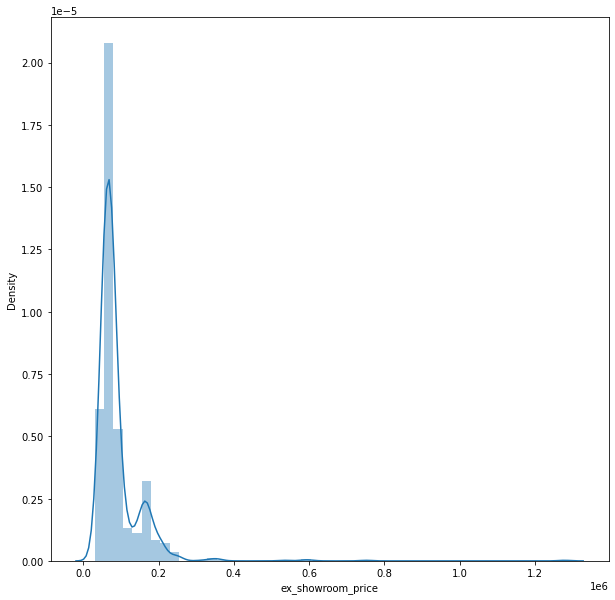

In [107]:
plt.figure(figsize=(10,10))
sns.distplot(data_copy['ex_showroom_price'])

<AxesSubplot:xlabel='ex_showroom_price', ylabel='Density'>

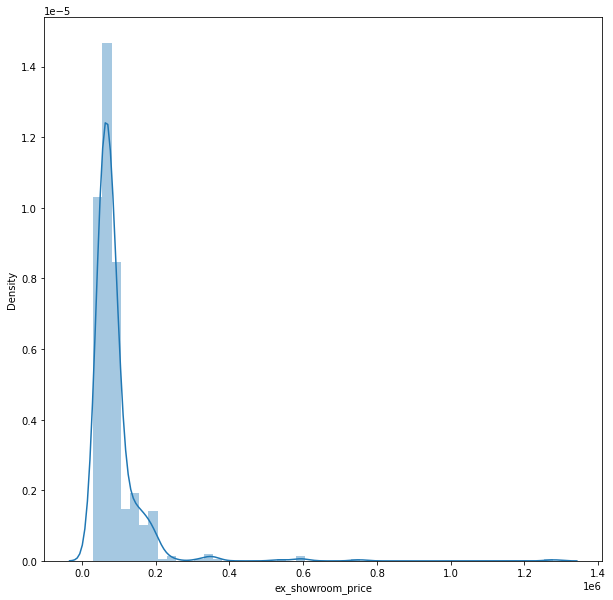

In [108]:
plt.figure(figsize=(10,10))
sns.distplot(data['ex_showroom_price'])


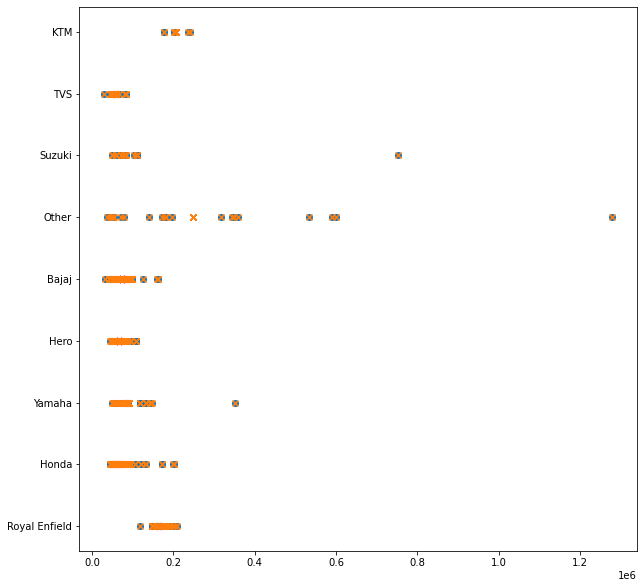

In [109]:
plt.figure(figsize=(10,10))
plt.scatter(data['ex_showroom_price'], data['brand'], marker='o',linewidths=1)
plt.scatter(data_copy['ex_showroom_price'], data_copy['brand'], marker='x',linewidths=1.5)

In [110]:
max_threshold = data_copy['ex_showroom_price'].quantile(0.999) # outlier Detection
max_threshold

742838.8000000083

In [111]:
data_copy[data_copy['ex_showroom_price']>max_threshold]

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,brand
134,750000,2013,Individual,2nd owner,12000,1278000.0,Other
295,760000,2019,Individual,1st owner,2800,752020.0,Suzuki


In [112]:
min_threshold = data_copy['ex_showroom_price'].quantile(0.001)
min_threshold

32340.5

In [113]:
data_copy[data_copy['ex_showroom_price']<min_threshold]

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,brand
851,30000,2017,Individual,1st owner,8000,30490.0,TVS
1055,18000,2017,Individual,1st owner,35000,32000.0,Bajaj


In [114]:
data_3 = data_copy[data_copy['ex_showroom_price']<max_threshold] #removing outlier

In [115]:
data_3.shape

(1059, 7)

In [116]:
data_3.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,58324.909348,2013.863078,34410.748820,88477.172672
std,47543.146605,4.302277,51658.213653,52233.947333
min,5000.000000,1988.000000,350.000000,30490.000000
25%,28000.000000,2011.000000,13650.000000,59302.500000
50%,45000.000000,2015.000000,25000.000000,72938.951049
75%,70000.000000,2017.000000,43000.000000,87292.500000
max,425000.000000,2020.000000,880000.000000,599000.000000


In [117]:
data_3['curr_yr'] = 2021
data_3.head()

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,brand,curr_yr
0,175000,2019,Individual,1st owner,350,165413.050000,Royal Enfield,2021
1,45000,2017,Individual,1st owner,5650,69254.158824,Honda,2021
2,150000,2018,Individual,1st owner,12000,148114.000000,Royal Enfield,2021
3,65000,2015,Individual,1st owner,23000,89643.000000,Yamaha,2021
4,20000,2011,Individual,2nd owner,21000,91438.755319,Yamaha,2021


In [118]:
data_3['no_of_yr'] = data_3['curr_yr'] - data_3['year']
data_3.head()

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,brand,curr_yr,no_of_yr
0,175000,2019,Individual,1st owner,350,165413.050000,Royal Enfield,2021,2
1,45000,2017,Individual,1st owner,5650,69254.158824,Honda,2021,4
2,150000,2018,Individual,1st owner,12000,148114.000000,Royal Enfield,2021,3
3,65000,2015,Individual,1st owner,23000,89643.000000,Yamaha,2021,6
4,20000,2011,Individual,2nd owner,21000,91438.755319,Yamaha,2021,10


In [119]:
data_3.drop(columns=['year','curr_yr'], inplace=True)

In [120]:
data_3.head()

,selling_price,seller_type,owner,km_driven,ex_showroom_price,brand,no_of_yr
0,175000,Individual,1st owner,350,165413.050000,Royal Enfield,2
1,45000,Individual,1st owner,5650,69254.158824,Honda,4
2,150000,Individual,1st owner,12000,148114.000000,Royal Enfield,3
3,65000,Individual,1st owner,23000,89643.000000,Yamaha,6
4,20000,Individual,2nd owner,21000,91438.755319,Yamaha,10


In [121]:
# data_3 = pd.get_dummies(data_3, columns = ['owner', 'seller_type','brand'], drop_first = True) #handling categorial data

In [122]:
label_encoder = preprocessing.LabelEncoder()
data_3['owner']= label_encoder.fit_transform(data_3['owner'])
print(data_3['owner'].unique())
data_3['brand']= label_encoder.fit_transform(data_3['brand'])
print(data_3['brand'].unique())
data_3['seller_type']= label_encoder.fit_transform(data_3['seller_type'])
print(data_3['seller_type'].unique())

[0 1 2 3]
[5 2 8 1 0 4 6 7 3]
[1 0]


In [123]:
data_3.head()

,selling_price,seller_type,owner,km_driven,ex_showroom_price,brand,no_of_yr
0,175000,1,0,350,165413.050000,5,2
1,45000,1,0,5650,69254.158824,2,4
2,150000,1,0,12000,148114.000000,5,3
3,65000,1,0,23000,89643.000000,8,6
4,20000,1,1,21000,91438.755319,8,10


# Spliting the Train and test data sets

In [124]:
X = data_3.drop('selling_price', axis=1)
y = data_3['selling_price']
X.head()

,seller_type,owner,km_driven,ex_showroom_price,brand,no_of_yr
0,1,0,350,165413.050000,5,2
1,1,0,5650,69254.158824,2,4
2,1,0,12000,148114.000000,5,3
3,1,0,23000,89643.000000,8,6
4,1,1,21000,91438.755319,8,10


In [125]:
print(data['brand'].unique())
print(data_3['brand'].unique())
print(data_3['seller_type'].dtype)

['Royal Enfield' 'Honda' 'Yamaha' 'Hero' 'Bajaj' 'Other' 'Suzuki' 'TVS'
 'KTM']
[5 2 8 1 0 4 6 7 3]
int32


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Training the model 

In [127]:
rf_random = RandomForestRegressor()

In [128]:
rf_random.fit(X_train,y_train)

RandomForestRegressor()

In [129]:
prediction=rf_random.predict(X_test)

# Model Evaluation

In [130]:
mae = mean_absolute_error(y_test, prediction)

In [131]:
mae

11195.922039532794

In [132]:
mse = mean_squared_error(y_test, prediction)

In [133]:
mse

277036613.9430408

In [134]:
r2_score(y_test, prediction)

0.8917429366320577

In [135]:
# Creating a pickel file for the classifier
filename = 'Bike_Price_ML_Model_main.pkl'
pickle.dump(rf_random,open(filename,'wb'))
print("Successfull")

Successfull
